# Линейная регрессия

## Задача №1. Построить модель линейной регрессии.

Для этого воспользуемся информацией из лекции:
- линейная функция: w0 + w1х1
- полином второй степени: w0 + w1x1 + w2x2
- полином третьей степени:w0 + w1x1 + w2x2 + w3x3
- экспоненциальная функция: w0 + w1*np.log(x)

Построим график линейной модели и посчитаем среднеквадратичную ошибку:

Для решения воспользуюсь первыми двумя предложенными вариантами (np.linalg.lstsq, np.polyfit)

In [211]:
import numpy as np
import matplotlib.pyplot as plt

In [212]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

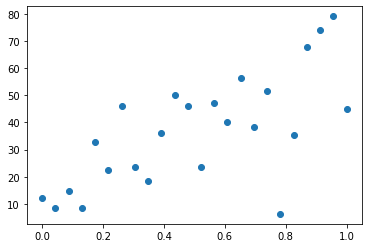

In [213]:
plt.scatter(x, y);

In [214]:
X = list(zip(np.ones(24), x))

In [215]:
W = np.linalg.lstsq(X, y, rcond=None)[0]

In [216]:
W

array([13.63803333, 46.5106    ])

In [217]:
def f(x, w): 
    return w[0] + w[1]*x

In [218]:
f(x, W)

array([13.63803333, 15.66023333, 17.68243333, 19.70463333, 21.72683333,
       23.74903333, 25.77123333, 27.79343333, 29.81563333, 31.83783333,
       33.86003333, 35.88223333, 37.90443333, 39.92663333, 41.94883333,
       43.97103333, 45.99323333, 48.01543333, 50.03763333, 52.05983333,
       54.08203333, 56.10423333, 58.12643333, 60.14863333])

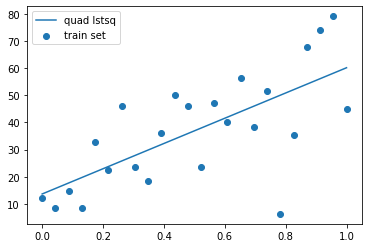

In [219]:
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W), label='quad lstsq')
plt.legend();

In [220]:
from sklearn.metrics import mean_squared_error

In [221]:
print('Среднеквадратичная ошибка равна:', mean_squared_error(y, f(x, W)))

Среднеквадратичная ошибка равна: 213.13469863888886


In [222]:
Z = np.polyfit(x,y,1)
print(Z)

[46.5106     13.63803333]


In [223]:
fun1 = Z[1] + Z[0]*x

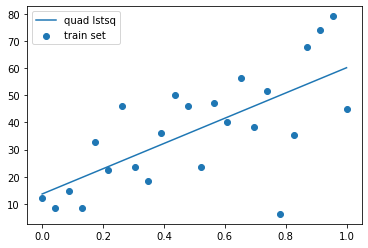

In [224]:
plt.scatter(x, y, label='train set')
plt.plot(x, fun1, label='quad lstsq')
plt.legend();

In [225]:
print('Среднеквадратичная ошибка равна:', mean_squared_error(y, fun1))

Среднеквадратичная ошибка равна: 213.13469863888886


Как мы можем заметить графики и значение среднеквадратичной ошибки совпали, значит оба варианта работают корректно.

Построим график полинома второй степени (квадратичная функция) и посчитаем среднеквадратичную ошибку:

In [226]:
import numpy as np
import matplotlib.pyplot as plt

In [227]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

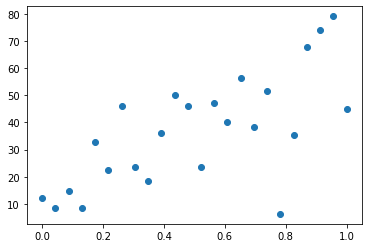

In [228]:
plt.scatter(x, y);

In [229]:
X = list(zip(np.ones(24), x, x*x))

In [230]:
W = np.linalg.lstsq(X, y, rcond=None)[0]

In [231]:
W

array([12.1867    , 55.61441818, -9.10381818])

In [232]:
def f(x, w): 
    return w[0] + w[1]*x + w[2]*x*x 

In [233]:
f(x,W)

array([12.1867    , 14.5875087 , 16.95389842, 19.28586917, 21.58342095,
       23.84655375, 26.07526759, 28.26956245, 30.42943834, 32.55489526,
       34.6459332 , 36.70255217, 38.72475217, 40.7125332 , 42.66589526,
       44.58483834, 46.46936245, 48.31946759, 50.13515375, 51.91642095,
       53.66326917, 55.37569842, 57.0537087 , 58.6973    ])

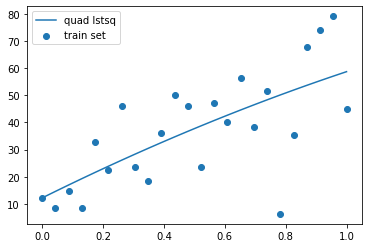

In [234]:
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W), label='quad lstsq')
plt.legend();

In [235]:
from sklearn.metrics import mean_squared_error

In [236]:
print('Среднеквадратичная ошибка равна:', mean_squared_error(y, f(x, W)))

Среднеквадратичная ошибка равна: 212.5935367855731


In [237]:
Z = np.polyfit(x,y,2)
print(Z)

[-9.10381818 55.61441818 12.1867    ]


In [238]:
fun2 = Z[2] + Z[1]*x + Z[0]*x*x

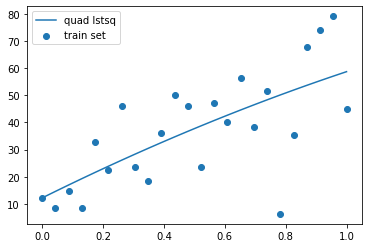

In [239]:
plt.scatter(x, y, label='train set')
plt.plot(x, fun2, label='quad lstsq')
plt.legend();

In [240]:
print('Среднеквадратичная ошибка равна:', mean_squared_error(y, fun2))

Среднеквадратичная ошибка равна: 212.5935367855731


Как мы можем заметить графики и значение среднеквадратичной ошибки совпали, значит оба варианта работают корректно.

Построим график полинома третьей степени (кубическая функция) и посчитаем среднеквадратичную ошибку:

In [241]:
import numpy as np
import matplotlib.pyplot as plt

In [242]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

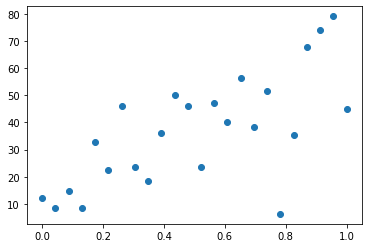

In [243]:
plt.scatter(x, y);

In [244]:
X = list(zip(np.ones(24), x, x*x, x*x*x))

In [245]:
W = np.linalg.lstsq(X, y, rcond=None)[0]

In [246]:
W

array([   5.65033333,  143.52996465, -233.63225758,  149.68562626])

In [247]:
def f(x, w): 
    return w[0] + w[1]*x + w[2]*x*x + w[3]*x*x*x

In [248]:
f(x,W)

array([ 5.65033333, 11.46142029, 16.46302503, 20.72896311, 24.33305007,
       27.34910145, 29.85093281, 31.91235968, 33.60719763, 35.00926219,
       36.19236891, 37.23033333, 38.19697101, 39.1660975 , 40.21152833,
       41.40707905, 42.82656522, 44.54380237, 46.63260606, 49.16679183,
       52.22017523, 55.86657181, 60.1797971 , 65.23366667])

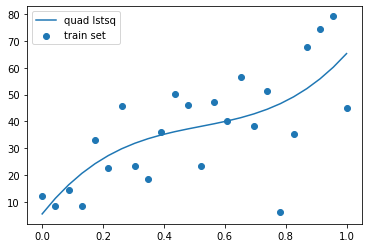

In [249]:
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W), label='quad lstsq')
plt.legend();

In [250]:
from sklearn.metrics import mean_squared_error

In [251]:
print('Среднеквадратичная ошибка равна:', mean_squared_error(y, f(x, W)))

Среднеквадратичная ошибка равна: 202.5130365909091


In [252]:
Z = np.polyfit(x,y,3)
print(Z)

[ 149.68562626 -233.63225758  143.52996465    5.65033333]


In [253]:
fun3 = Z[3] + Z[2]*x + Z[1]*x*x + Z[0]*x*x*x

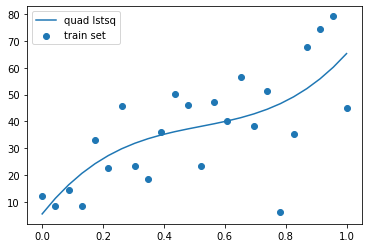

In [254]:
plt.scatter(x, y, label='train set')
plt.plot(x, fun3, label='quad lstsq')
plt.legend();

In [255]:
print('Среднеквадратичная ошибка равна:', mean_squared_error(y, fun3))

Среднеквадратичная ошибка равна: 202.51303659090908


Как мы можем заметить графики и значение среднеквадратичной ошибки совпали, значит оба варианта работают корректно.

Построим график експоненциальной функции и посчитаем среднеквадратичную ошибку:

In [256]:
import numpy as np
import matplotlib.pyplot as plt

In [257]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0.01, 1, num = 24)

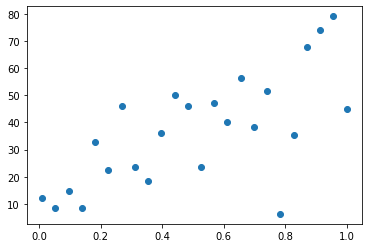

In [258]:
plt.scatter(x, y);

In [259]:
X = list(zip(np.ones(24), np.log(x)))

In [260]:
W = np.linalg.lstsq(X, y, rcond=None)[0]

In [261]:
W

array([49.18970248, 12.03689879])

In [262]:
def f(x, w): 
    return w[0] + w[1]*np.log(x)

In [263]:
f(x, W)

array([-6.24226497, 13.8416236 , 20.99324659, 25.44880451, 28.69334967,
       31.24642793, 33.35160668, 35.14283135, 36.70170539, 38.08164506,
       39.31953096, 40.44189919, 41.46848138, 42.41434898, 43.29127432,
       44.10862834, 44.87399235, 45.59358659, 46.27257773, 46.91530413,
       47.52544394, 48.10614265, 48.66011118, 49.18970248])

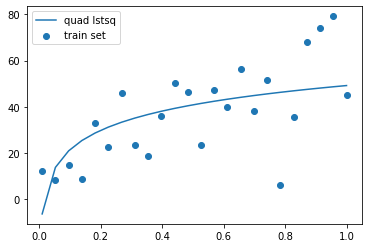

In [264]:
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W), label='quad lstsq')
plt.legend();

In [265]:
from sklearn.metrics import mean_squared_error

In [266]:
print('Среднеквадратичная ошибка равна:', mean_squared_error(y, f(x, W)))

Среднеквадратичная ошибка равна: 246.11565235289535


In [267]:
Z = np.polyfit(np.log(x), y, 1)
print(Z)

[12.03689879 49.18970248]


In [268]:
fun4 = Z[1] + Z[0]*np.log(x)

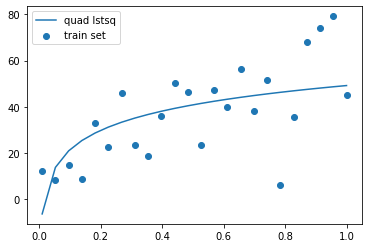

In [269]:
plt.scatter(x, y, label='train set')
plt.plot(x, fun4, label='quad lstsq')
plt.legend();

In [270]:
print('Среднеквадратичная ошибка равна:', mean_squared_error(y, fun4))

Среднеквадратичная ошибка равна: 246.11565235289535


Как мы можем заметить графики и значение среднеквадратичной ошибки совпали, значит оба варианта работают корректно.

## Задача №2